In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

In [3]:
loan_data = pd.read_csv('Data/train.csv')

In [4]:
loan_data.shape

(255347, 18)

In [6]:
loan_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [8]:
loan_data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [32]:
loan_data_sample = loan_data.sample(frac=0.1, random_state=42)

In [45]:
loan_data_sample.shape

(25535, 18)

In [46]:
loan_data_sample.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
51139,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,3,3,1,1,1,3,0,0
71005,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,0,1,0,1,1,4,1,0
35684,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,2,1,2,1,1,4,1,0
174087,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,0,1,1,0,0,2,1,0
137952,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,3,0,1,0,1,2,1,0


In [33]:
loan_data_sample.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

<Axes: xlabel='Education', ylabel='count'>

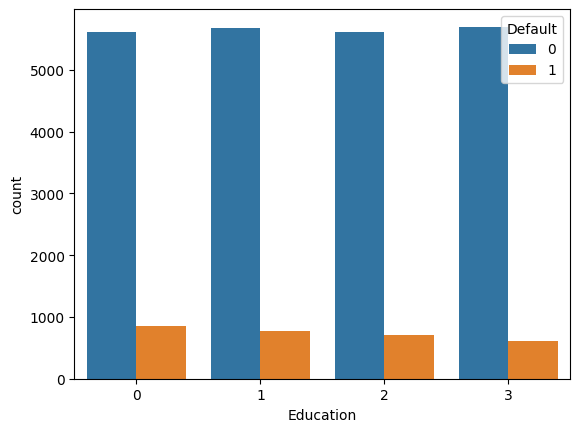

In [34]:
sns.countplot(x='Education', hue='Default', data=loan_data_sample)

<Axes: xlabel='MaritalStatus', ylabel='count'>

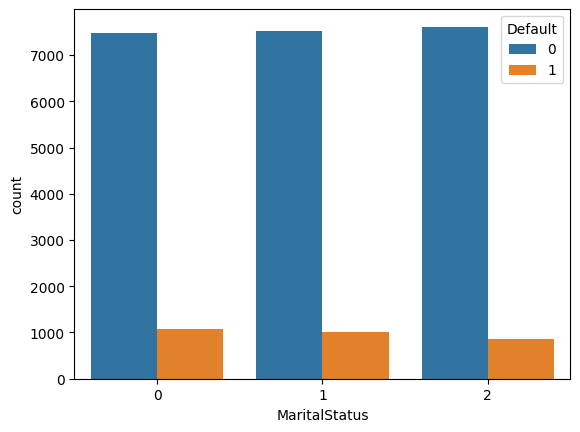

In [35]:
sns.countplot(x='MaritalStatus', hue='Default', data=loan_data_sample)

<Axes: xlabel='LoanPurpose', ylabel='count'>

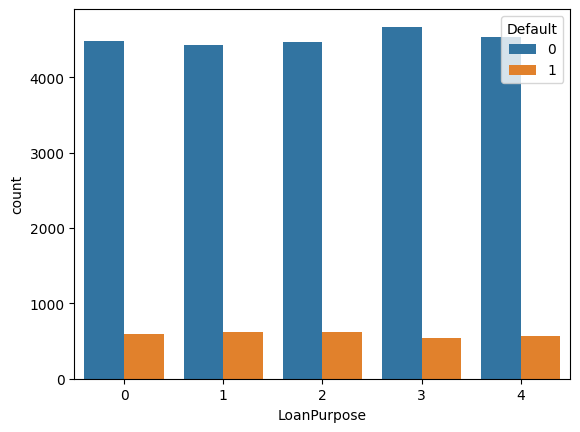

In [36]:
sns.countplot(x='LoanPurpose', hue='Default', data=loan_data_sample)

In [44]:
loan_data_sample.shape

(25535, 18)

In [37]:
cat_cols = loan_data_sample.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)

Categorical columns: Index(['LoanID'], dtype='object')


In [38]:
for col in cat_cols:
    if loan_data_sample[col].nunique() < 10:
        print(f"{col} -> {loan_data_sample[col].unique()}")

In [47]:
loan_data_sample.replace({'Education': {"High School":0,"Bachelor's":1,"Master's":2,"PhD":3},
                   'EmploymentType':{'Unemployed':0,'Part-time':1,'Full-time':2,'Self-employed':3},
                   'MaritalStatus':{'Divorced':0,'Single':1,'Married':2},
                   'HasMortgage':{'No':0,'Yes':1},
                   'HasDependents':{'No':0,'Yes':1},
                   'LoanPurpose':{'Other':0,'Auto':1,'Business':2,'Home':3,'Education':4},
                   'HasCoSigner':{'No':0,'Yes':1}},inplace=True)

In [48]:
for col in cat_cols:
    if loan_data_sample[col].nunique() < 10:
        print(f"{col} -> {loan_data_sample[col].unique()}")

In [49]:
loan_data_sample.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
51139,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,3,3,1,1,1,3,0,0
71005,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,0,1,0,1,1,4,1,0
35684,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,2,1,2,1,1,4,1,0
174087,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,0,1,1,0,0,2,1,0
137952,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,3,0,1,0,1,2,1,0


In [50]:
X = loan_data_sample.drop(columns=['LoanID','Default'])
Y = loan_data_sample['Default']

In [73]:
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, Y)
selected_features = X.columns[selector.get_support()]
scores = selector.scores_
print("Selected features", selected_features)

Selected features Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'InterestRate', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasCoSigner'],
      dtype='object')


In [75]:
for  feature, score in zip(X.columns, scores):
    print(f"{feature}: {score: .2f}")

Age:  3752.90
Income:  4235290.35
LoanAmount:  7576429.17
CreditScore:  1407.88
MonthsEmployed:  5165.62
NumCreditLines:  6.91
InterestRate:  1520.97
LoanTerm:  0.29
DTIRatio:  2.08
Education:  32.81
EmploymentType:  21.00
MaritalStatus:  15.24
HasMortgage:  12.10
HasDependents:  13.84
LoanPurpose:  4.79
HasCoSigner:  21.00


In [52]:
X_selected = X[selected_features]

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

In [54]:
print(X.shape,X_train.shape,X_test.shape)

(25535, 16) (20428, 10) (5107, 10)


In [72]:
svm_classifier = svm.SVC(kernel='linear')

In [ ]:
svm_classifier.fit(X_train, Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [60]:
X_train_predictions = classifier.predict(X_train)
Training_data_accuracy = accuracy_score(Y_train, X_train_predictions)

In [61]:
print("Training data accuracy:", Training_data_accuracy)

Training data accuracy: 0.8792343841785785


In [62]:
Test_predictions = classifier.predict(X_test)
Test_data_accuracy = accuracy_score(Y_test, Test_predictions)

In [63]:
Test_data_accuracy

0.8809477188173096

In [67]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [68]:
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
RF_train_predictions = model.predict(X_train)
RF_Training_data_accuracy = accuracy_score(Y_train, RF_train_predictions)
print("Random Forest Training data accuracy:", RF_Training_data_accuracy)

Random Forest Training data accuracy: 0.9999510475817506


In [71]:
RF_test_predictions = model.predict(X_test)
RF_Test_data_accuracy = accuracy_score(Y_test, RF_test_predictions)
print("Random Forest Test data accuracy:", RF_Test_data_accuracy)

Random Forest Test data accuracy: 0.8889759154102213
